In [1]:
from onset_functions import *
import onset_widgets as w

# Choose spacecraft, sensor, viewing direction and particle species from the drop-down menu:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)
display(w.radio_button, w.radio_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'SOHO'), value='STEREO-A…

Dropdown(description='Sensor:', options=('SEPT', 'HET'), value='SEPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

Checkbox(value=False, description='Radio Spectrum', indent=False)

Dropdown(description='Spacecraft:', disabled=True, options=('STEREO-A', 'STEREO-B', 'WIND (Coming soon!)'), va…

# Set the data path and date range to load data:

In [3]:
# The path to where data is located / to be downloaded (by default the current directory)
data_path = f"{os.getcwd()}"

# Format of date: year, month, day
startdate = datetime.date(2021, 10, 28)
enddate = datetime.date(2021, 10, 29)

# Set the time range for the plot (Leave to None to plot the entire data file):
plot_range = ["2021-10-28 00:00", "2021-10-29 00:00"]

# Set the averaging period, or leave to None to not resample data
# averaging should be a pandas-compatible string, e.g. '1h', '2min', '15s'
averaging = None #"2min"

# Select the color map used for the plot, by default 'magma'
# for avavailable options, cf. https://matplotlib.org/stable/tutorials/colors/colormaps.html
cmap = 'magma'  # e.g. 'jet', 'viridis', 'magma'

# Just run, don't edit:

In [4]:
# Get event data:
Event_class = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value,
                    start_date=startdate, end_date=enddate, download_radio=w.radio_button.value,
                    data_path=data_path)

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

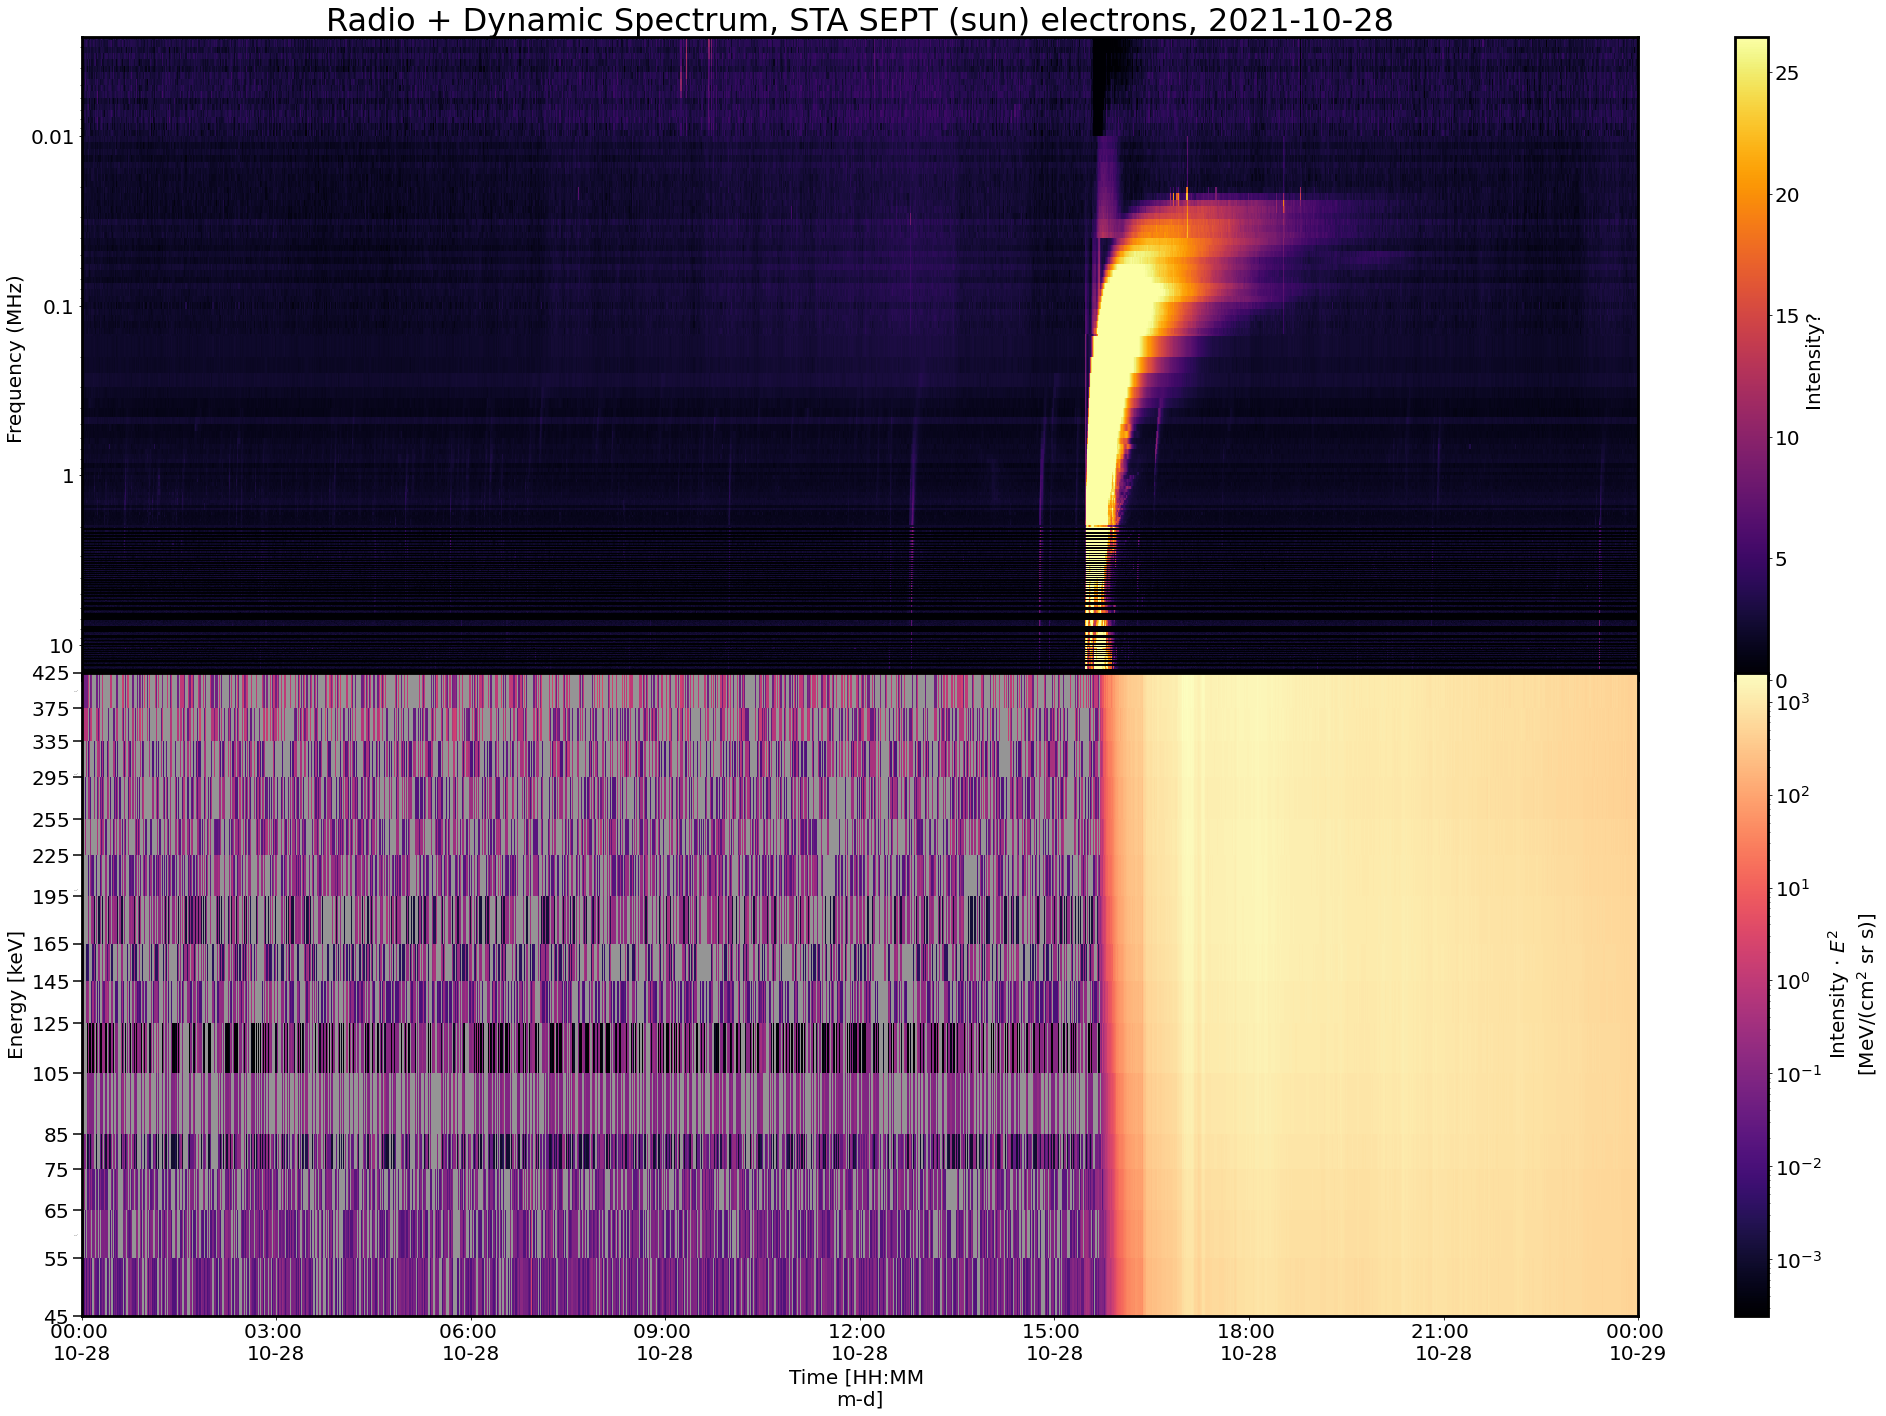

In [5]:
Event_class.dynamic_spectrum(w.view_drop.value, xlim=plot_range, resample=averaging)

# Saving the plot

In [1]:
# Path to save the plots
plot_path = f'{os.getcwd()}'

# Use a pre-generated name for the file:
if not w.radio_button.value:
    file_name = f"{plot_path}{os.sep}{w.spacecraft_drop.value.replace(' ', '_')}_{w.sensor_drop.value}_{w.view_drop.value+'_' if w.view_drop.value is not None else ''}{w.species_drop.value}{'_'+averaging if averaging is not None else ''}_{startdate.strftime('%Y%m%d')}.png"
else:
    file_name = f"{plot_path}{os.sep}{w.radio_drop.value}_radio_spectrum_{w.spacecraft_drop.value.replace(' ', '_')}_{w.sensor_drop.value}_{w.view_drop.value+'_' if w.view_drop.value is not None else ''}{w.species_drop.value}{'_'+averaging if averaging is not None else ''}_{startdate.strftime('%Y%m%d')}.png"

# Or type your own here:
# file_name = ""

NameError: name 'os' is not defined

In [13]:
# Check that the name is correct
print(file_name)

/home/chospa/Documents/Github/tsa_ds/STEREO-A_radio_spectrum_STEREO-A_SEPT_sun_electrons_20211009.png


In [16]:
# Save plot
Event_class.fig.savefig(file_name, facecolor="white", transparent=False)